# Изучение закономерностей, определяющих успешность игр

<font color='navy' size=4>**Ход исследования**</font>

1. [Подготовить данные к изучению.](#start)
2. [Провести исследовательский анализ:](#2)
    - выявить наиболее перспективные в ближайшее время платформы;
    - определить игры каких жанров являются наиболее продаваемыми;
    - проверить, что влияет в регионах на популярность жанров и платформ;
    - выяснить, зависит ли успешная продажа игр от оценок критиков и пользователей, и если зависит, то каким образом и насколько сильно; 
    - также исследовать влияние рейтинга на популярность игр.
3. [На основе выбранных платформ и игр построить и проверить гипотезы, чтобы убедиться в правильности выбора.](#3)

## 1. Подготовить данные к изучению.<a id='start'></a>

###  Откройте файл с данными и изучите общую информацию

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from scipy import stats as st


In [3]:
# прочитаем файл с данными
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    try:
        df = pd.read_csv('games.csv')
    except: 
        df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


По результатам просмотра исходного датасета наблюдаем, что среди 11 столбцов пропуски имеются в 6 столбцах.

### Подготовьте данные

In [4]:
#приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [5]:
#заменим тип данных "года выпуска" на целочисленный
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [6]:
#заменим значения 'tbd' на nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [7]:
#заменим тип значений "оценки пользователей" на float для будущих расчетов
df['user_score'] = df['user_score'].astype('float')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Обработка пропущеных значений**

In [9]:
#заменим пропуски на "значения-заглушки" 
df['user_score'].fillna(-1, inplace=True)

Посмотрим на пропуски в столбцах рейтинг, оценки критиков/экспертов.

In [10]:
df[df['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


In [11]:
df[df['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,NaN


Пропуски в столбцах рейтинг и оценки критиков корректно заполнить значения невозможно, придется оставлять в таком виде.

In [12]:
#проверим пропуски в столбце рейтинг 
df['rating'].isna().sum()

6766

In [13]:
#заменим пропуски на 'Рейтинг не определен'
df['rating'].fillna('Рейтинг не определен', inplace=True)

In [14]:
df['rating'].isna().sum()

0

**Пропуски в столбце годы выпуска**

In [15]:
#посчитаем долю пропусков
df['year_of_release'].isna().sum() / len(df['year_of_release'])

0.01609332934489979

**Общие продажи**

In [16]:
#создадим столбец суммарные продажи по всем регионам
df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [17]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,Рейтинг не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,Рейтинг не определен,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,-1.0,Рейтинг не определен,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,Рейтинг не определен,0.01


In [18]:
#проверим количество дубликатов в столбце name
df['name'].duplicated().sum()

5155

In [19]:
df['name'].value_counts()

Need for Speed: Most Wanted                 12
FIFA 14                                      9
LEGO Marvel Super Heroes                     9
Madden NFL 07                                9
Ratatouille                                  9
                                            ..
James Pond: Codename Robocod                 1
7th Dragon 2020-II                           1
Ore no Shikabane o Koete Yuke                1
Sonic X: Game Boy Advance Video Volume 1     1
The Sky Crawlers: Innocent Aces              1
Name: name, Length: 11559, dtype: int64

In [20]:
# целесообразно удалить повторяюшиеся названия одной и той же игры
df = df.drop_duplicates(subset=['name'])

In [21]:
#сбросим индексы в датафрейме
df = df.reset_index(drop=True)

In [22]:
df['name'].duplicated().sum()

0

    - Заполнение пропусков: 1) Только половина игр имеют рейтинг в системе ESRB и оценки критиков/экспертов, заполнение пропусков синтетическими данными будет неправдоподобным и может исказить результаты исследования. 2) Количество пропусков в названии игры, годах и жанрах незначительное (меньше 5%), поэтому критичной необходимости заполнять эти пропуски нет.
    - Столбцы с годом и оценкой пользователей находились не в оптимальных типах данных и заменены на int и float.
    - Значения 'tbd' в столбце с оценкой пользователей пока не определены и заменены на nan, чтобы строка не мешала обработке при вычислениях со столбцом.
    - В столбце name удалены дубликаты названий игр.

## 2. Проведите исследовательский анализ данных<a id='2'></a>

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [23]:
#посмотрим сколько игр выпускалось в разные годы
df['year_of_release'].value_counts()

2008    986
2009    956
2010    859
2007    837
2011    747
2006    723
2005    615
2002    565
2004    521
2003    487
2001    410
2012    405
1998    347
2015    331
2000    300
1999    293
2013    293
2014    279
2016    279
1997    268
1996    247
1995    200
1994    111
1993     59
1981     43
1991     40
1992     37
1982     33
1986     21
1983     16
1987     15
1990     14
1989     14
1984     13
1985     13
1988     11
1980      8
Name: year_of_release, dtype: Int64

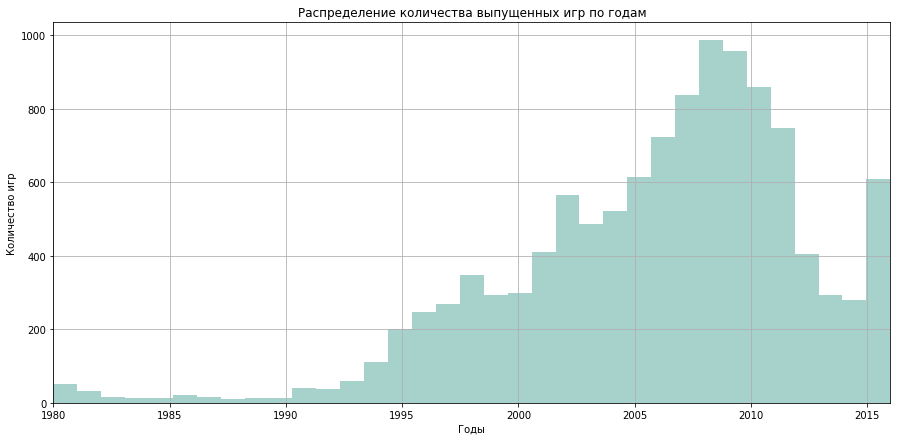

In [24]:
df['year_of_release'].hist(bins = 35, figsize = (15, 7), color='#A7D2CB')
plt.xlim(1980, 2016)

plt.title('Распределение количества выпущенных игр по годам')
plt.xlabel('Годы') 
plt.ylabel('Количество игр')
plt.show()

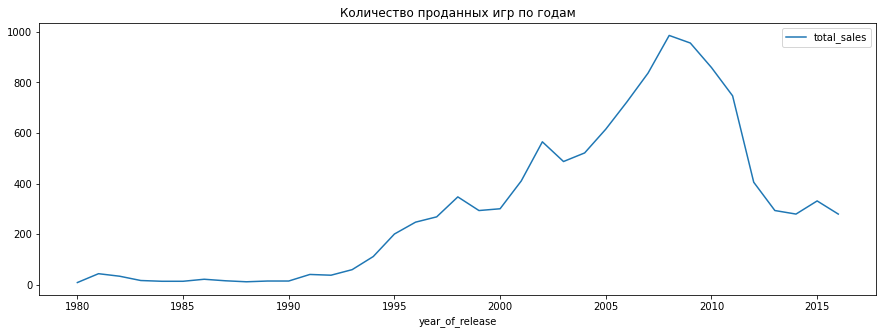

In [25]:
df.pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'count')\
     .plot(title = 'Количество проданных игр по годам', figsize=(15,5))
plt.show()

In [26]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,11396.000000,11560.000000,11560.000000,11560.000000,11560.000000,4880.000000,11560.000000,11560.000000
mean,2005.702439,0.283681,0.156358,0.104119,0.050266,68.802459,2.204438,0.594424
std,6.140379,0.935884,0.570209,0.363673,0.212883,14.235909,4.142267,1.781385
min,1980.000000,0.000000,0.000000,0.000000,0.000000,19.000000,-1.000000,0.000000
25%,2002.000000,0.000000,0.000000,0.000000,0.000000,60.000000,-1.000000,0.060000
50%,2007.000000,0.060000,0.020000,0.000000,0.010000,71.000000,-1.000000,0.170000
75%,2010.000000,0.240000,0.110000,0.060000,0.030000,79.000000,7.125000,0.500000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.600000,82.540000


- Индустрия игр в целом имеет падающий тренд начиная с 2008 года, игр с каждым годом производится все меньше.
- Максимальное количество игр в выборке было выпущено между 2006 и 2011 годами.
- Распределение годов скошено влево, 75% игр в данных выпущены после 2003 года. Данные за более ранний период не так важны для анализа. 

**Посмотрите, как менялись продажи по платформам.**

In [27]:
# рейтинг продаж по платформам
sales_by_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
sales_by_platform

platform
PS2     1140.12
Wii      773.25
PS       700.38
DS       692.77
X360     576.50
PS3      525.87
PS4      255.01
GBA      247.48
GB       234.88
NES      234.59
3DS      228.57
PSP      206.61
SNES     195.45
N64      189.83
PC       174.04
GC       111.82
XB       105.41
2600      88.71
WiiU      53.95
PSV       32.70
XOne      31.82
SAT       29.68
GEN       25.16
DC        12.98
SCD        1.86
NG         1.11
WS         0.66
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

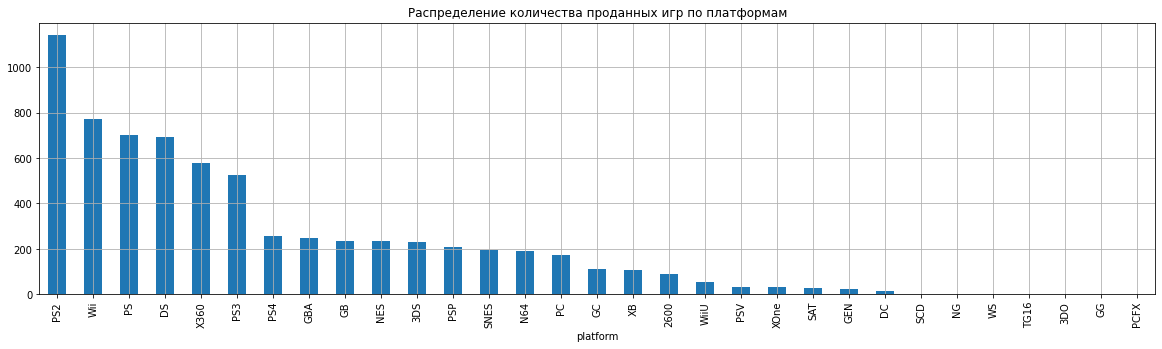

In [28]:
sales_by_platform.plot(kind = 'bar', grid = True, figsize = (20,5), title = 'Распределение количества проданных игр по платформам')
plt.show()

По графику виден рейтинг всех игровых платформ в индустрии, самые популярные 'PS2', 'X360', 'PS3', 'Wii'.

 **Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [29]:
#возьмем топ-10 платформ с наибольшими суммарными продажами 
top10 = sales_by_platform.sort_values(ascending=False).head(10).index
top10

Index(['PS2', 'Wii', 'PS', 'DS', 'X360', 'PS3', 'PS4', 'GBA', 'GB', 'NES'], dtype='object', name='platform')

In [30]:
#создадим датафрейм включающий только топ-10 платформ с наибольшими суммарными продажами 
df_platform_top10 = df.query('platform in @top10')
df_platform_top10

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,-1.0,Рейтинг не определен,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1.0,Рейтинг не определен,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
11548,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.00,0.00,48.0,-1.0,E,0.01
11550,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
11554,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,NaN,-1.0,E,0.01
11557,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,-1.0,Рейтинг не определен,0.01


In [31]:
#сводная таблица топ-10 платформ по годам
df_platform_top10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

platform,DS,GB,GBA,NES,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,,,,
1983,NaN,NaN,NaN,9.83,NaN,NaN,NaN,NaN,NaN,NaN
1984,NaN,NaN,NaN,48.86,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.02,NaN,NaN,53.03,NaN,NaN,NaN,NaN,NaN,NaN
1986,NaN,NaN,NaN,36.41,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,19.76,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,NaN,38.67,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,59.25,NaN,7.85,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,4.89,NaN,9.49,NaN,NaN,NaN,NaN,NaN,NaN
1991,NaN,4.84,NaN,6.11,NaN,NaN,NaN,NaN,NaN,NaN


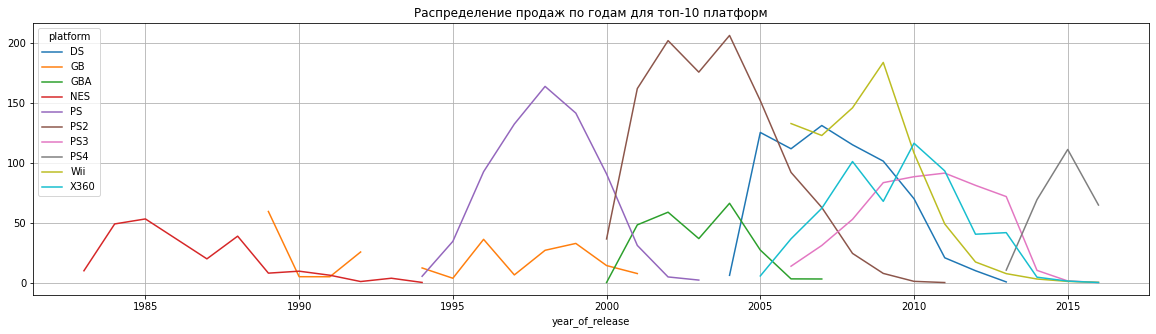

In [32]:
#выведем график продаж топ-10 платформ по годам
df_platform_top10.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(20,5), grid=True, title='Распределение продаж по годам для топ-10 платформ')
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Хороший тип графика!

Из данного графика видно на протяжении какого времени платформы зарабатывали, а когда продажи спускались к нулевому значению. Можно увидеть, что характерный срок жизни платформ составляет 10 лет, с 2000 по 2006 был пик продаж и спроса и платформы создавались каждый год, а к 2015 году их количество сильно сократилось, большая часть перестала существовать, новая платформа появилась уже в 2013 году. Так же на графике видно, что пик продаж наступает примерно через 3-5 лет после выпуска платформы. 

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

Исходя их прошлого графика видно, что некоторые плотформы начали появляться в 2013г. При планировании 2017 года  необходимо в первую очередь брать в расчет платформы и жанры, актуальные на 2016 год, поэтому проанализируем период за последние 4 года - с 2013 по 2016 год.

In [33]:
#сохраним в отдельный датафрейм те игры, которые были выпущены после 2013 года
list_of_years = [y for y in range(2013, 2017)]
df_2013_2016=df[df['year_of_release'].isin(list_of_years)]
df_2013_2016                

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
30,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,-1.0,Рейтинг не определен,14.63
32,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,-1.0,Рейтинг не определен,14.60
42,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,-1.0,Рейтинг не определен,11.68
52,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
...,...,...,...,...,...,...,...,...,...,...,...,...
11537,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
11549,The Longest 5 Minutes,PSV,2016,Action,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
11553,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01
11556,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,-1.0,Рейтинг не определен,0.01


**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

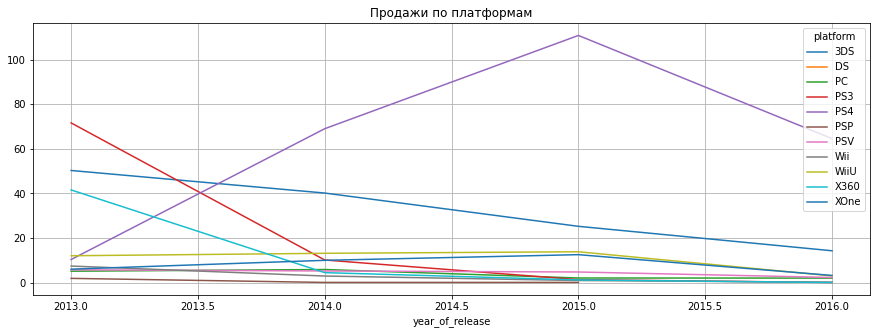

In [34]:
df_2013_2016.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')\
.T.plot.line(grid=True, figsize=(15,5), title='Продажи по платформам')
plt.show()

- По графику видно, что в период с 2013 по 2016 года лидерами по продажам являются новые платформы 3DS и PS4, но после 2015 начали довольно резкое падение, тем не менее они сохраняют за собой большую часть рынка.
- Платформа PSP в итоге прекратила свое существование.
- Продажи по всем платформам падали.

**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

In [35]:
games_sales = df_2013_2016.groupby(['name', 'platform'], as_index=False)['total_sales'].sum()
games_sales

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Haikyu!! Cross Team Match!,3DS,0.04
4,1/2 Summer +,PSP,0.01
...,...,...,...
1177,Zoo Tycoon (2013),XOne,0.36
1178,Zumba Fitness: World Party,XOne,0.24
1179,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,0.05
1180,htoL#NiQ: The Firefly Diary,PSV,0.01


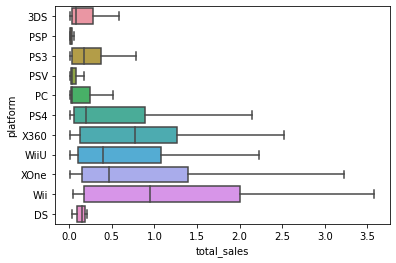

In [36]:
seaborn.boxplot(data=games_sales, x='total_sales', y='platform', showfliers=False)
plt.show()

<div class="alert-success"> 
<b>Комментарий ревьюера 👍 </b>

Отлично, что ты используешь библиотеку seaborn, а не стандартные инструменты matplotlob. Так "ящики с усами" получаются намного более репрезентативными.

Диаграмма размаха показывает как распределены продажи игр на каждой платформе. Можем выделить несколько платформ, которые выделяются: Wii и PS4 и XOne. Медиана у всех платформ, кроме Wii, не выходит за рамки 0.5 млн продаж.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

В качестве популярной платформы возьмем PS4

In [37]:
df_ps4 = df[df['platform'] == 'PS4']
df_corr = df_ps4[['total_sales', 'critic_score', 'user_score']]

In [38]:
df_corr.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.418959,0.112559
critic_score,0.418959,1.000000,0.553964
user_score,0.112559,0.553964,1.000000


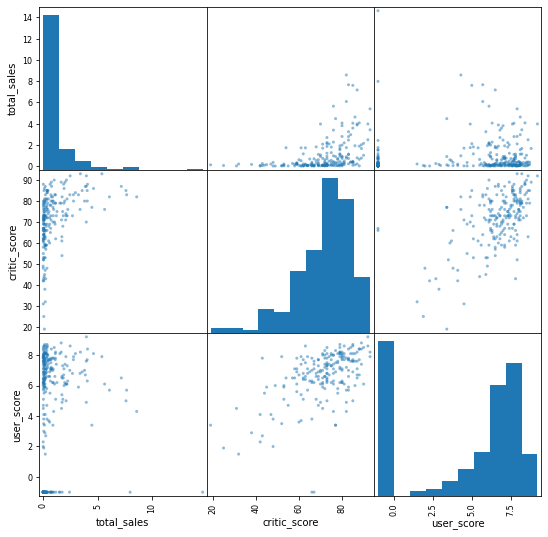

In [39]:
pd.plotting.scatter_matrix(df_corr, figsize=(9, 9))
plt.show()

- У total_sales и critic_score существует слабая корреляция (0.4), по графику видно, что влияние проявляется только в самом верху рейтинга.
- У total_sales и user_score корреляция отсуствует (-0.03).
- Получается, к критикам покупатели как-то прислушиваются только в случае высокого рейтинга, мнением других пользователей не интересуются вообще.
При этом оценки пользователей и критиков имеют небольшую взаимосвязь, коэффициент корреляции (0.5).


**Соотнесите выводы с продажами игр на других платформах.**

In [40]:
#создадим функцию по примеру исследования платформы 'PS4'
def other_platform_games(name_of_platform):
    df_cur_platform = df_2013_2016[df_2013_2016['platform'] == name_of_platform]
    df_corr = df_cur_platform[['total_sales', 'critic_score', 'user_score']]
    print(df_corr.corr(), i)
    pd.plotting.scatter_matrix(df_corr, figsize=(9, 9))
    plt.show()

In [41]:
#видим что столбец 'critic_score' состоит из Nan  исключим эту платформу из исследования
df_2013_2016[df_2013_2016['platform']=='Wii']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
312,Just Dance 2014,Wii,2013,Misc,1.88,1.39,0.00,0.31,NaN,6.2,E10+,3.58
644,Skylanders SWAP Force,Wii,2013,Platform,1.21,0.75,0.00,0.19,NaN,6.6,E10+,2.15
709,Just Dance 2015,Wii,2014,Misc,0.99,0.85,0.00,0.17,NaN,8.4,E10+,2.01
946,Disney Infinity,Wii,2013,Action,1.05,0.41,0.00,0.14,NaN,4.2,E10+,1.60
1687,Just Dance 2016,Wii,2015,Misc,0.41,0.46,0.00,0.08,NaN,-1.0,E10+,0.95
1688,Skylanders: Trap Team,Wii,2014,Action,0.41,0.46,0.00,0.08,NaN,-1.0,E10+,0.95
5552,Just Dance 2017,Wii,2016,Misc,0.06,0.11,0.00,0.01,NaN,-1.0,E10+,0.18
8122,The Croods: Prehistoric Party!,Wii,2013,Misc,0.01,0.05,0.00,0.00,NaN,-1.0,Рейтинг не определен,0.06
8829,Pretty Cure All Stars Everyone Gather ? Let's ...,Wii,2013,Misc,0.00,0.00,0.05,0.00,NaN,-1.0,Рейтинг не определен,0.05


In [42]:
#видим что столбец 'critic_score' состоит из Nan  исключим эту платформу из исследования
df_2013_2016[df_2013_2016['platform']=='DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5190,Disney's Planes,DS,2013,Simulation,0.11,0.08,0.0,0.02,NaN,-1.0,E,0.21
5540,The Smurfs 2,DS,2013,Platform,0.00,0.17,0.0,0.01,NaN,-1.0,E,0.18
6692,Moshi Monsters: Katsuma Unleashed,DS,2013,Action,0.00,0.11,0.0,0.01,NaN,-1.0,E,0.12
9814,Turbo: Super Stunt Squad,DS,2013,Sports,0.00,0.03,0.0,0.00,NaN,-1.0,E,0.03


In [43]:
# видим что столбец 'critic_score' состоит из одного значения, что не имеет статистической значимости, исключим эту платформу из исследования
df_2013_2016[df_2013_2016['platform']=='PSP']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4968,Sword Art Online: Infinity Moment,PSP,2013,Role-Playing,0.0,0.0,0.22,0.0,NaN,-1.0,Рейтинг не определен,0.22
6174,Summon Night 5,PSP,2013,Role-Playing,0.0,0.0,0.15,0.0,74.0,8.3,T,0.15
6597,7th Dragon 2020-II,PSP,2013,Role-Playing,0.0,0.0,0.13,0.0,NaN,-1.0,Рейтинг не определен,0.13
6742,Fate/Extra CCC,PSP,2013,Action,0.0,0.0,0.12,0.0,NaN,-1.0,Рейтинг не определен,0.12
6770,Uta no * Prince-Sama: All Star,PSP,2013,Action,0.0,0.0,0.12,0.0,NaN,-1.0,Рейтинг не определен,0.12
7015,Shining Ark,PSP,2013,Role-Playing,0.0,0.0,0.11,0.0,NaN,-1.0,Рейтинг не определен,0.11
7216,Digimon Adventure,PSP,2013,Role-Playing,0.0,0.0,0.10,0.0,NaN,-1.0,Рейтинг не определен,0.10
7562,Uta no Prince-Sama: Music 2,PSP,2013,Adventure,0.0,0.0,0.09,0.0,NaN,-1.0,Рейтинг не определен,0.09
7827,Uta no Prince-Sama: All Star After Secret,PSP,2015,Action,0.0,0.0,0.08,0.0,NaN,-1.0,Рейтинг не определен,0.08
8709,Gintama no Sugoroku,PSP,2013,Action,0.0,0.0,0.06,0.0,NaN,-1.0,Рейтинг не определен,0.06


              total_sales  critic_score  user_score
total_sales      1.000000      0.434877    0.227916
critic_score     0.434877      1.000000    0.467734
user_score       0.227916      0.467734    1.000000 PS3


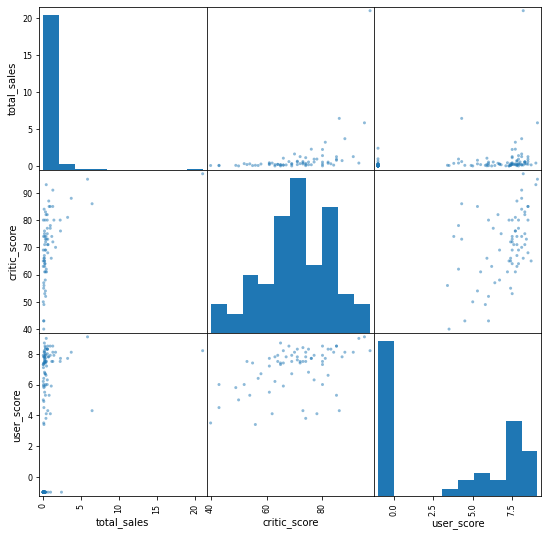

              total_sales  critic_score  user_score
total_sales      1.000000      0.418959    0.112559
critic_score     0.418959      1.000000    0.553964
user_score       0.112559      0.553964    1.000000 PS4


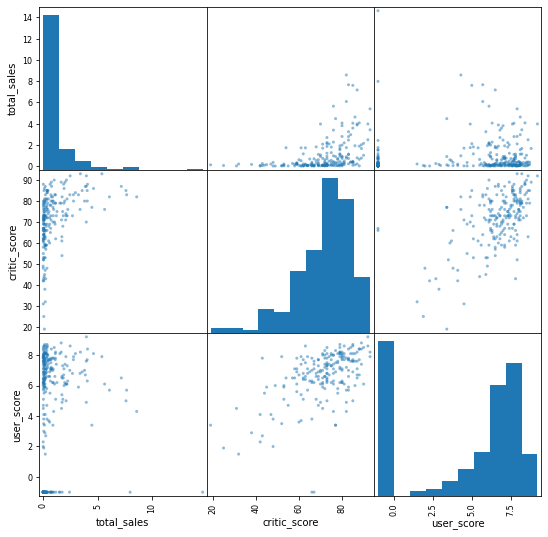

              total_sales  critic_score  user_score
total_sales      1.000000      0.347968    0.053452
critic_score     0.347968      1.000000    0.658067
user_score       0.053452      0.658067    1.000000 3DS


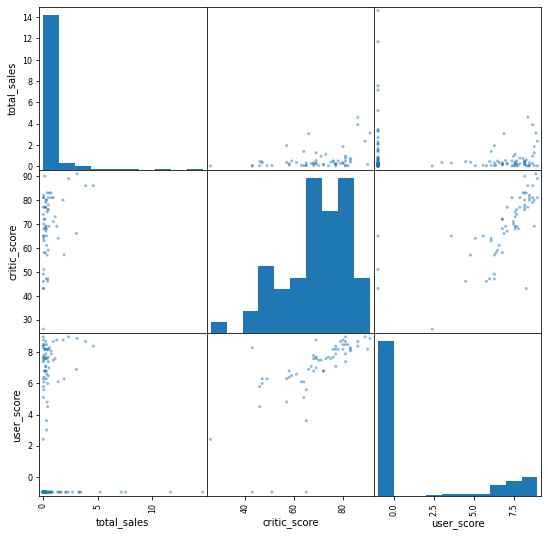

              total_sales  critic_score  user_score
total_sales      1.000000      0.279331   -0.039364
critic_score     0.279331      1.000000    0.672463
user_score      -0.039364      0.672463    1.000000 X360


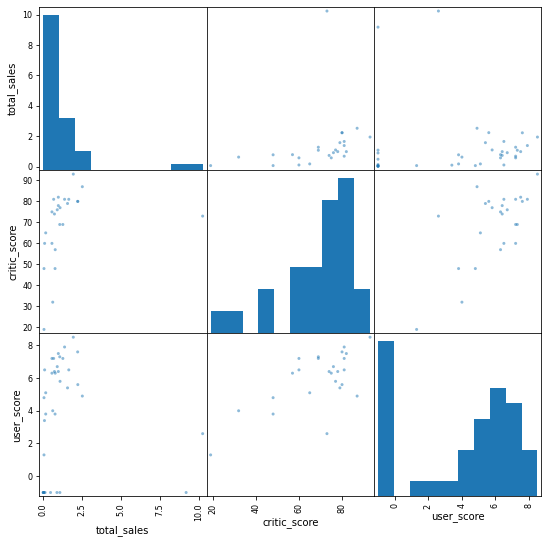

              total_sales  critic_score  user_score
total_sales      1.000000      0.414601    0.421737
critic_score     0.414601      1.000000    0.522956
user_score       0.421737      0.522956    1.000000 WiiU


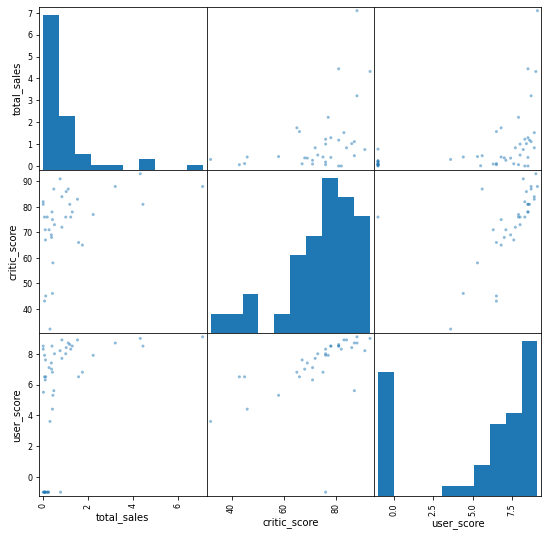

              total_sales  critic_score  user_score
total_sales      1.000000      0.518354    0.397306
critic_score     0.518354      1.000000    0.648256
user_score       0.397306      0.648256    1.000000 XOne


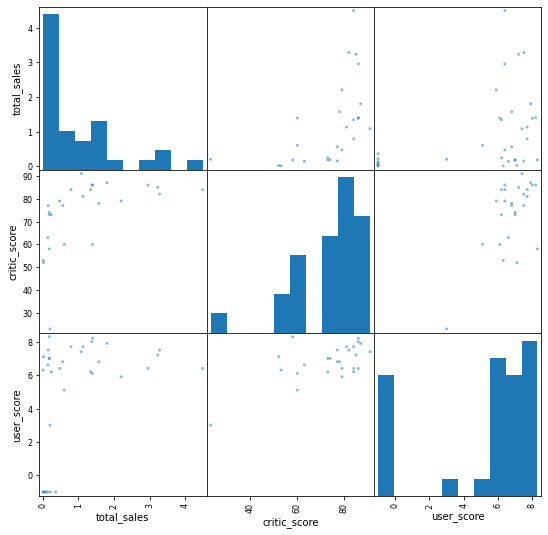

              total_sales  critic_score  user_score
total_sales      1.000000      0.085947    0.070855
critic_score     0.085947      1.000000    0.423150
user_score       0.070855      0.423150    1.000000 PC


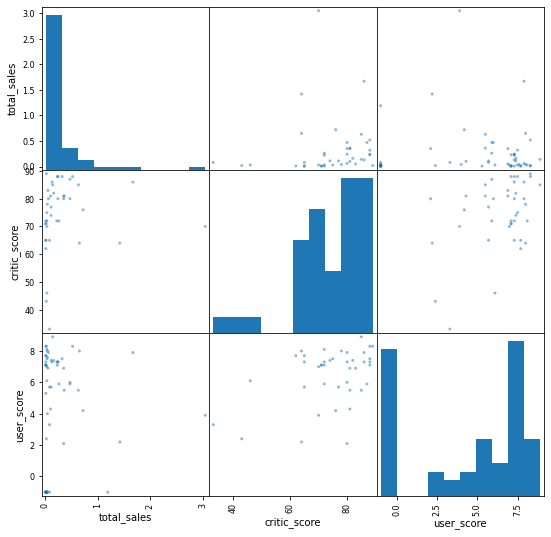

              total_sales  critic_score  user_score
total_sales      1.000000      0.266631    0.568437
critic_score     0.266631      1.000000    0.665047
user_score       0.568437      0.665047    1.000000 PSV


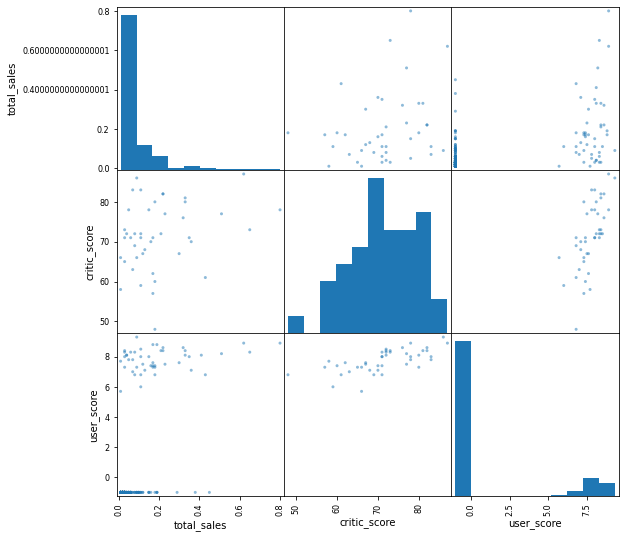

In [44]:
# с помощью цикла выведем остальные 8 графиков 
unique_platform = df_2013_2016['platform'].unique()
for i in unique_platform:
    if i == 'Wii' or i == 'DS' or i == 'PSP':
        pass
    else:
        other_platform_games(i)

Значения корреляции и матрицы диаграмм рассеяния не выявили существенной взаимосвязи между оценкой критиков/пользователей и продажами на всех платформах корреляция слабая (коэффициент корреляции < 0.5), но на платформе  3DS и  WiiU присутствует высокая прямая связь  между оценками пользователей и критиков (коэффициент корреляции > 0.7).
    


**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [45]:
genre = df_2013_2016.groupby(['genre'])['total_sales'].describe()
genre

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,381.0,0.446142,1.333456,0.01,0.0300,0.080,0.2800,21.05
Adventure,167.0,0.093593,0.237330,0.01,0.0200,0.020,0.0600,1.66
Fighting,43.0,0.516977,1.214109,0.01,0.0550,0.150,0.3700,7.55
Misc,99.0,0.351818,1.033607,0.01,0.0300,0.080,0.2400,9.18
Platform,36.0,0.838889,1.019355,0.01,0.0975,0.300,1.4850,4.32
Puzzle,12.0,0.245833,0.374541,0.01,0.0275,0.085,0.2025,1.19
Racing,34.0,0.907353,1.390913,0.05,0.0725,0.370,1.3200,7.09
Role-Playing,176.0,0.588011,1.677144,0.01,0.0575,0.135,0.3600,14.60
Shooter,72.0,1.769861,2.596470,0.01,0.1825,0.745,2.1575,14.63


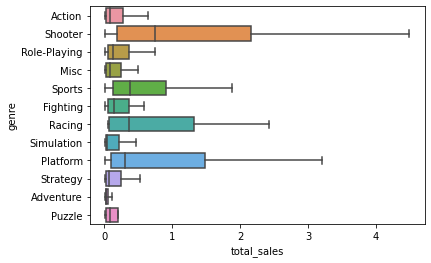

In [46]:
seaborn.boxplot(data=df_2013_2016, x='total_sales', y='genre', showfliers=False)
plt.show()

Медианное значение распределения количества продаж по жанрам хорошо видно на "ящиках с усами". Самые прибыльные жанры Shooter, Sports, Racing. 

По -среднему значению так же в лидерах с большим отрывом Shooter, затем идут жанры Sports и Racing.

In [47]:
genre_rating = df_2013_2016.groupby(['genre']).agg({'total_sales':'sum', 'name':'count'})\
.sort_values(by='total_sales', ascending=False)                                

In [48]:
genre_rating.columns=('total_sales', 'number_of_games')
genre_rating

,total_sales,number_of_games
genre,,
Action,169.98,381
Shooter,127.43,72
Role-Playing,103.49,176
Sports,72.45,74
Misc,34.83,99
Racing,30.85,34
Platform,30.20,36
Fighting,22.23,43
Simulation,18.72,47


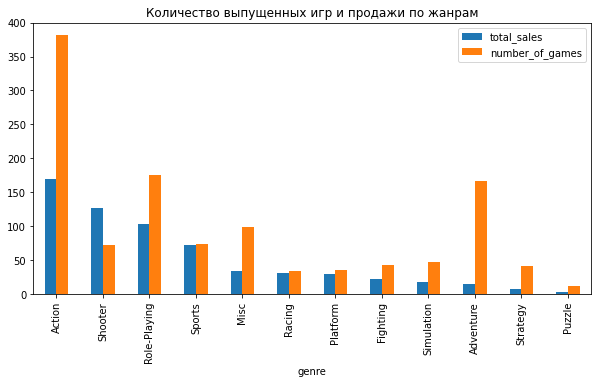

In [49]:
genre_rating.plot(kind = 'bar', figsize = (10,5), title = 'Количество выпущенных игр и продажи по жанрам')
plt.show()

- Самый  прибыльный жанр Action, это и понятно, больше всего игр выпускается в этом жанре.
- На втором и третьем месте по продажам шутер и спорт. 
- Ролевые игры и приключения на втором и третьем месте по выпуску, но размер их продаж невелик и значительно уступает шутерам и спорту.
- Самые прибыльные жанры -это экшн,  шутеры и спорт, а самые неприбыльные -приключения и паззлы.

###  Составьте портрет пользователя каждого региона

**Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [69]:
sales_by_reg_2013_2016=(df_2013_2016.pivot_table(index='platform',\
                                                 values=('na_sales','eu_sales', 'jp_sales','other_sales','total_sales'),\
                                                 aggfunc='sum'))
sales_by_reg_2013_2016

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
3DS,27.13,63.08,34.28,5.61,130.10
DS,0.39,0.00,0.11,0.04,0.54
PC,10.40,0.00,3.55,1.17,15.12
PS3,30.73,14.55,25.54,12.41,83.23
PS4,115.48,12.71,87.47,39.35,255.01
PSP,0.00,2.10,0.00,0.00,2.10
PSV,2.16,12.20,2.37,1.35,18.08
Wii,4.48,0.05,6.02,0.98,11.53
WiiU,12.23,8.82,18.12,2.93,42.10


В других странах самые популярные платформы PS4, PS3, PSV, XOne и X360 (в порядке убывания)

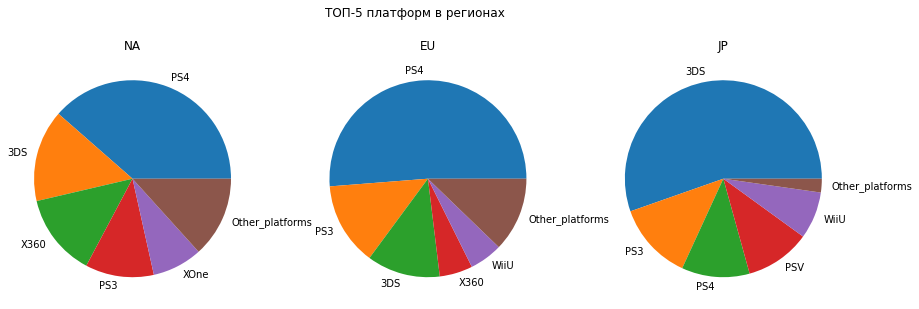

In [70]:
# задаем список регионов
countries = df_2013_2016.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП-5 платформ в регионах')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (df_2013_2016.groupby('platform')[countries[i]].sum().
             reset_index().
             sort_values(countries[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальыне продажи в Other_platforms
  df_i = df_i.append({'platform': 'Other_platforms', countries[i]: df_2013_2016[countries[i]].sum() - df_i[countries[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[countries[i]], labels = df_i['platform'])

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()

В Европе самые популярные платформы PC, DS, PS4, Wii и PS3 (в порядке убывания)

В Японии самые популярные платформы PSP, PSV, 3DS, WiiU и PS3 (в порядке убывания)

В Северной Америке самые популярные платформы X360, XOne, Wii, WiiU и DS (в порядке убывания)

**Самые популярные жанры (топ-5). Поясните разницу.**

In [53]:
genre_by_reg_2013_2016=(df_2013_2016.pivot_table(index='genre',\
                                                 values=('na_sales','eu_sales', 'jp_sales','other_sales','total_sales'),\
                                                 aggfunc='sum'))
                                         
genre_by_reg_2013_2016

,eu_sales,jp_sales,na_sales,other_sales,total_sales
genre,,,,,
Action,60.11,31.90,57.12,20.85,169.98
Adventure,4.99,4.88,4.24,1.52,15.63
Fighting,5.15,5.84,9.04,2.20,22.23
Misc,10.22,7.60,14.46,2.55,34.83
Platform,10.64,4.20,12.57,2.79,30.20
Puzzle,1.00,1.06,0.74,0.15,2.95
Racing,15.34,2.16,9.76,3.59,30.85
Role-Playing,24.31,41.94,29.75,7.49,103.49
Shooter,49.56,5.02,55.67,17.18,127.43


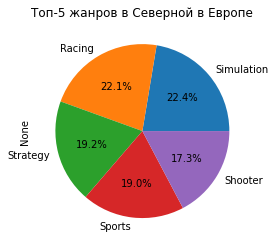

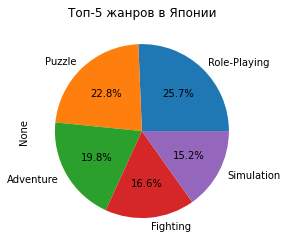

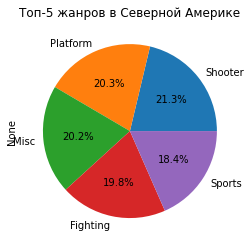

In [54]:
#топ-5 жанров в Европе
top5_eu_genre = genre_by_reg_2013_2016['eu_sales'] / genre_by_reg_2013_2016['total_sales']
top5_eu_genre.sort_values(ascending=False).head()\
                                        .plot.pie(y='total_sales', autopct='%.1f%%')

plt.title('Топ-5 жанров в Северной в Европе')
plt.show()

#топ-5 жанров в Японии
top5_eu_genre = genre_by_reg_2013_2016['jp_sales'] / genre_by_reg_2013_2016['total_sales']
top5_eu_genre.sort_values(ascending=False).head()\
                                         .plot.pie(y='total_sales', autopct='%.1f%%')

plt.title('Топ-5 жанров в Японии')
plt.show()       

#топ-5 жанров в Северной Америке
top5_eu_genre = genre_by_reg_2013_2016['na_sales'] / genre_by_reg_2013_2016['total_sales']
top5_eu_genre.sort_values(ascending=False).head()\
                                          .plot.pie(y='total_sales', autopct='%.1f%%')

plt.title('Топ-5 жанров в Северной Америке')
plt.show() 


В Европе самые популярные жанры игр Racing, Simulation, Strategy, Sports, Shooter  (в порядке убывания)      

В Японии самые популярные жанры игр Puzzle, Role-Playing, Adventure, Fighting, Simulation  (в порядке убывания) 

В Северной Америке самые популярные жанры игр Shooter, Fighting, Misc, Sports, Platform  (в порядке убывания) 

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [55]:
df_2013_2016['rating'].unique()

array(['M', 'Рейтинг не определен', 'E', 'T', 'E10+'], dtype=object)

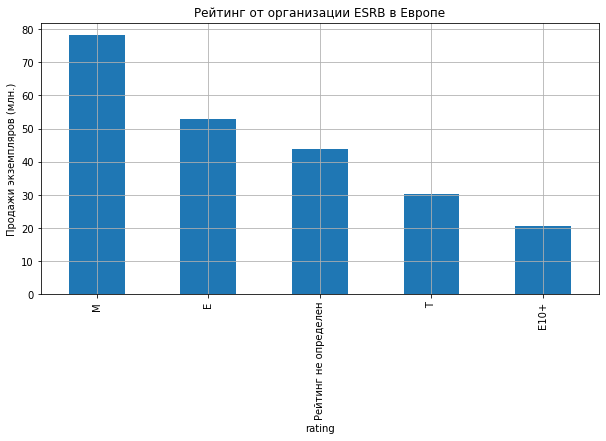

In [56]:
# Рейтинг от организации ESRB в Европе

rating_eu = df_2013_2016.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'Рейтинг от организации ESRB в Европе')

#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Европе самые высокие продажи у рейтинга M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.)

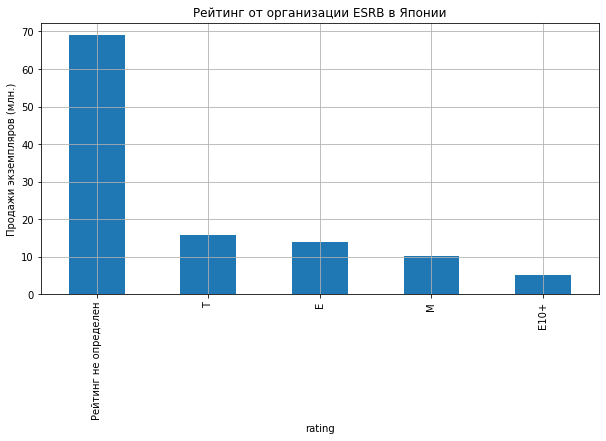

In [57]:
# Рейтинг от организации ESRB в Японии

rating_jp = df_2013_2016.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'Рейтинг от организации ESRB в Японии')
#меняем наименование горизонтальной линии ('X')

#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Японии самые высокие продажи у игр, где 'Рейтинг не определен', на 2 месте игры с рейтингом Т (Подходит для лиц старше 13 лет). 

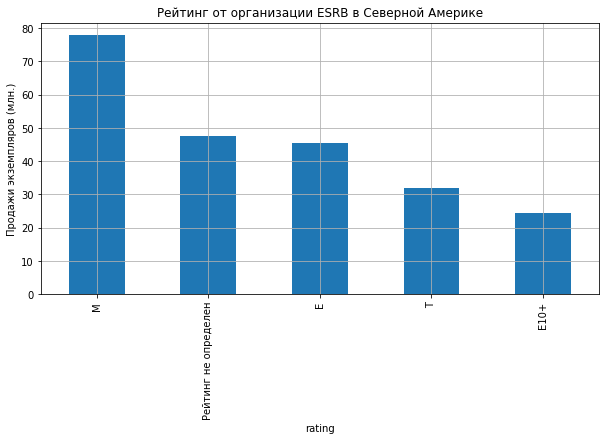

In [58]:
# Рейтинг от организации ESRB в Северной Америке

rating_na = df_2013_2016.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
#меняем наименование горизонтальной линии ('X')

#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В Северной Америке самые высокие продажи у рейтинга  M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.), на 2 месте - 'Рейтинг не определен'.

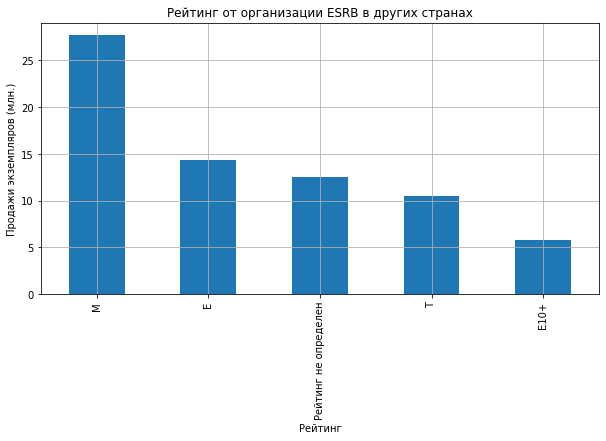

In [59]:
# Рейтинг от организации ESRB в других странах

rating_other = df_2013_2016.groupby('rating')['other_sales'].sum().sort_values(ascending=False)
#построим гистограмму
rating_other.plot(x = 'rating', y = 'other_sales', kind = 'bar', figsize=(10,5), grid=True, title = 'Рейтинг от организации ESRB в других странах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

В других странах самые высокие продажи у рейтинги  M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.)

Можем выделить, что по наиболее используемым платформам и популярным жанрам каждый регион сильно отличается топовыми позициями.  Самые популярные рейтинги от организации ESRB в играх, где "Рейтинг не определен"  и категории М (для лиц старше 17 лет), сответсвенно, можно предположить, что рейтинг в большинстве стран на продажи не влияет. 

По нашей таблице:

Рейтинг по платформам:
в Северной Америке - X360
в Европе - PS
в Японии - PSP
в других странах - PS4

Рейтинг по жанрам:
в Северной Америке - Shooter
в Европе - Racing
в Японии - Puzzle
в других странах - Sports

Рейтинг от организации ESRB:
в Северной Америке - M
в Европе - M
в Японии - Рейтинг не определен
в других странах - M

## Проверьте гипотезы<a id='3'></a>

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для проверки гипотезы "средние пользовательские рейтинги платформ Xbox One и PC одинаковые" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
- H0: средние рейтинги по платформам одинаковые
- H1: средние рейтинги по платформам разные

In [60]:
#выведем две выборки по необходимым платформам
df_xbox = df_2013_2016[df_2013_2016['platform'] == 'XOne']
df_pc = df_2013_2016[df_2013_2016['platform'] == 'PC']

In [61]:
#обозначим две выборки конкретных столбцов с пользовательскими рейтингами
xbox = df_xbox['user_score']
pc = df_pc['user_score']

In [62]:
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xbox, 
    pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.2895919364453534
Не получилось отвергнуть нулевую гипотезу


**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Для проверки гипотезы "средние пользовательские рейтинги жанров Action и Sports разные" в качестве нулевой и альтернативной гипотезы мы взяли следующее:
- H0: средние рейтинги по жанрам одинаковые
- H1: средние рейтинги по жанрам разные

In [63]:
df_action = df_2013_2016[df_2013_2016['genre'] == 'Action']
df_sports = df_2013_2016[df_2013_2016['genre'] == 'Sports']

In [64]:
action = df_action['user_score']
sports = df_sports['user_score']

In [65]:
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(
      action,
      sports)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.0005316281053890514
Отвергаем нулевую гипотезу


В первой гипотезе:
Результат говорит о том, что нулевая гипотеза (средние рейтинги по платформам одинаковые) не может быть отвергнута, значит, вероятно, что она верна.
p-значение: 0.14012658403611647

Во второй гипотезе:
Результат говорит о том, что нулевая гипотеза (средние рейтинги по жанрам одинаковые) отвергается,  получается,  они различны.
p-значение: 1.0517832389140023e-27

### Общий вывод

Перед анализом данных мы подготовили наши данные: привели к нижнему регистру названия колонок, привели к правильным типам данных необходимые столбцы, определили, что аббревиатура TBD значит to be determined - то есть, данные были нарочно не заполнены. Поэтому заменили tbd на nan для проведения дальнейшего анализа. Проведя анализ, мы выявили, что количество игр  начало расти с большой скоростью с 90х до 2008 года. С 2008 года  произошел резкий спад продажи игр. Индустрия игр в целом имеет падающий тренд начиная с 2008 года, игр с каждым годом производится все меньше.
Максимальное количество игр в выборке было выпущено между 2006 и 2011 годами. 
За весь период самыми популярными платформами оказались 'PS2', 'X360', 'PS3', 'Wii'. Также мы выявили, что средняя продолжительность жизни игровой приставки составляет порядка 10 лет. Самый пик продаж наступает примерно через 3-5 лет после выпуска платформы. 

Дальше был анализирован период с 2013-2016 года. Самыми популярными платформами на рынке в мире стали являться - PS4, XOne, Wii. 
У платформ лидеров наблюдается взаимосвязь между оценками пользователей и оценками критиков. Для продаж, пользовательские и оценки критиков не играют значимой роли. Это значит, что для покупателя мнение критиков или пользователей не важны и они не интересуются их оценками при покупке игры. Самые прибыльные жанры Shooter, Sports, Racing. 
Топ - рейтинг от организации ESRB можно твердо считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет) и игры "Рейтинг не определен".


После мы составили портреты пользователей каждого региона за исследуемый период:

Самые популярные игровые платформы в Северной Америке это: X360, XOne, Wii, WiiU и DS. Топ 5 жанров в Северной Америке : Shooter, Fighting, Misc, Sports, Platform. По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 и выше".

Самые популярные игровые платформы в Европе это: PC, DS, PS4, Wii и PS3 . Топ 5 жанров в Европе : Racing, Simulation, Strategy, Sports, Shooter. По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 и выше". 

Самые популярные игровые платформы в Японии это: PSP, PSV, 3DS, WiiU и PS3 . Топ 5 жанров в Японии : Puzzle, Role-Playing, Adventure, Fighting, Simulation . По рейтингам видно, что больше всего продаж у игр, где рейтинг не определен". 

Самые популярные игровые платформы в других странах это: PS4, PS3, PSV, XOne и X360. Топ 5 жанров в других странах: PS4, PS3, PSV, XOne и X360 . По рейтингам видно, что больше всего продаж у игр с рейтингом "от 17 и выше".

В конце проекта нам необходимо было проверить две гипотезы: "средние пользовательские рейтинги платформ XOne и PC одинаковые" и "средние пользовательские рейтинги жанров Action и Sports разные". В результате проверки можем сделать вывод, о том что есть большая вероятность, что обе гипотезы верные.

По итогам можно сделать прогноз на 2017 год в игровой индустрии.

На следующий год ставку можно делать на платформу PS4, т.к. она популярна в большинстве стран мира. Наиболее прибыльными жанрами являются Action, Shooter, Sports и игры с рейтингом от 17 лет и выше.


